**'국내 부동산 시장은 버블인가'라는 주제로 진행한 데이터 가공, 시각화 프로젝트 입니다.**

6.19, 8.2, 9.13 부동산 대책 등을 포함하여 현 정권 아래 실행된 부동산 정책만 20가지가 넘습니다. 그럼에도 불구하고 서울 집 값 상승은 주저하지 않고 상승하는 모습을 보이며, PIR도 꾸준히 상승하는 추세입니다. 이에 따라, 국내 부동산 시장이 자연스럽게 버블일 수도 있겠다는 생각이 들었으며 이를 확인하고자 경제 대조 분석을 실시하였습니다. 

버블 여부를 파악하기 위해 미국의 2000년 대, 일본의 1980년 대의 경제와 비교하는 방법론을 택했습니다.

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import datetime
import statsmodels.api as sm
import seaborn as sns
import os 
%matplotlib inline

plt.style.use("seaborn-whitegrid")


# HOUSING INDEX (부동산 지수) 

- REAL ESTATE HOUSE INDEX 
- 층화추출법에 의해 추출되는 n개의 집에 대한 가격 지수 
- 기준년도: 2010 


In [5]:
# 필요한 데이터 확보 및 활용 가능한 변수 선택 

data = pd.read_excel('1 housing_index.xlsx')
col1 = [["Japan", "Japan", "Japan", "Japan", "Korea","Korea","Korea","Korea","US","US","US","US"], 
       ["Nominal Index", "Nominal Change", "Real Index", "Real Change", "Nominal Index", "Nominal Change", "Real Index", "Real Change", "Nominal Index", "Nominal Change", "Real Index", "Real Change"]]

data.set_index("Unnamed: 0", inplace = True)
data.columns = col1
data.index.name = "Date"
data = data.iloc[85:, :]

data["Year"] = data.index.strftime("%Y").astype(int)

## 1978~2019 전체기간에 대해 지수 시각화

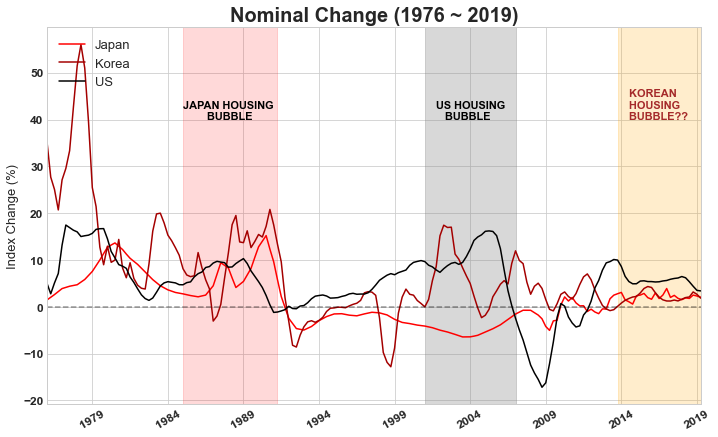

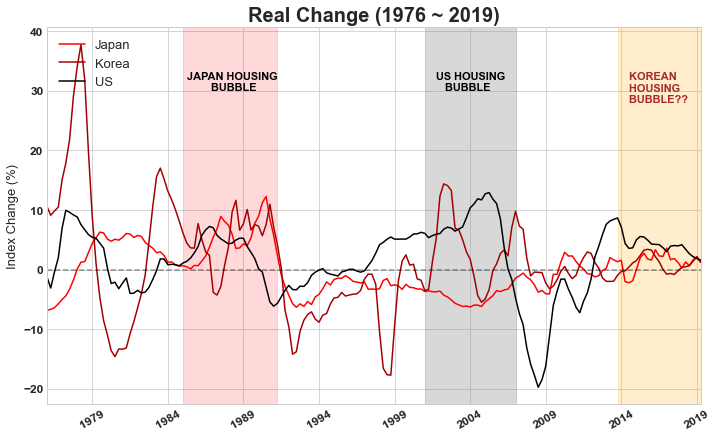

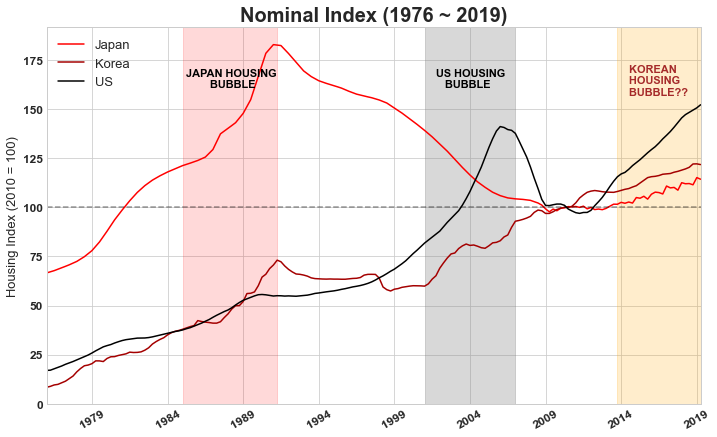

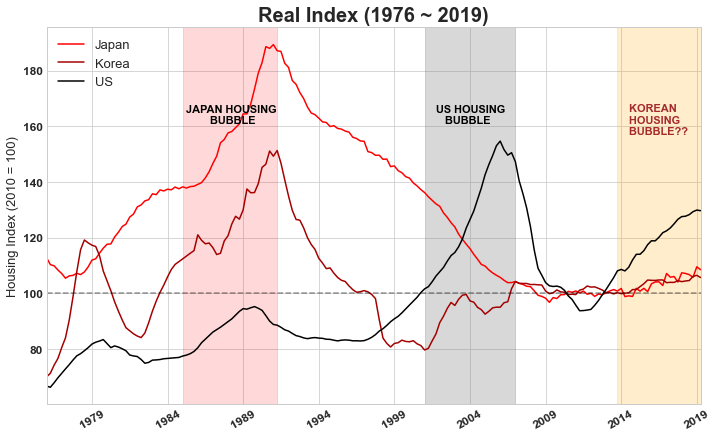

In [6]:
# 부동산 지수를 그리는 함수 

def houseplot(data, datatype): 

    data.xs(datatype, level = 1, axis = 1).plot(cmap = "flag");
    plt.gcf().set_size_inches(10,6)
    plt.title("{} (1976 ~ 2019)".format(datatype), fontsize = 20, fontweight = "bold")
    plt.xlabel("", fontsize = 13)
    if (datatype == "Nominal Change"):
        plt.ylabel("Index Change (%)", fontsize = 13)
        plt.axhline(y = 0, c = "black", alpha = 0.4, linestyle = "--")
        
        plt.axvspan("2013-12-31","2019-06-30" ,alpha=0.2, color='orange')
        plt.text("2014-09-30",40, "KOREAN \nHOUSING \nBUBBLE?? ", fontweight= "bold", fontsize = 11, color = "brown")

        plt.axvspan("2001-01-31","2007-01-31" ,alpha=0.3, color='grey')
        plt.text("2001-12-31",40, "US HOUSING \n   BUBBLE", fontweight= "bold", fontsize = 11, color = "black")

        plt.axvspan("1985-01-31","1991-06-30" ,alpha=0.15, color='red')
        plt.text("1985-03-31",40, "JAPAN HOUSING \n        BUBBLE", fontweight= "bold", fontsize = 11, color = "black")
        plt.legend(loc=2, fontsize = 13)
        
    elif (datatype == "Real Change"): 
        plt.ylabel("Index Change (%)", fontsize = 13)
        plt.axhline(y = 0, c = "black", alpha = 0.4, linestyle = "--")
        
        plt.axvspan("2013-12-31","2019-06-30" ,alpha=0.2, color='orange')
        plt.text("2014-09-30",28, "KOREAN \nHOUSING \nBUBBLE?? ", fontweight= "bold", fontsize = 11, color = "brown")

        plt.axvspan("2001-01-31","2007-01-31" ,alpha=0.3, color='grey')
        plt.text("2001-12-31",30, "US HOUSING \n   BUBBLE", fontweight= "bold", fontsize = 11, color = "black")

        plt.axvspan("1985-01-31","1991-06-30" ,alpha=0.15, color='red')
        plt.text("1985-06-30",30, "JAPAN HOUSING \n        BUBBLE", fontweight= "bold", fontsize = 11, color = "black")
        plt.legend(loc=2, fontsize = 13)
        
        
    else: 
        #plt.xticks([])
        plt.ylabel("Housing Index (2010 = 100)", fontsize = 13)
        plt.axhline(y = 100, c = "black", alpha = 0.4, linestyle = "--")
        
        plt.axvspan("2013-12-31","2019-06-30" ,alpha=0.2, color='orange')
        plt.text("2014-09-30",157, "KOREAN \nHOUSING \nBUBBLE?? ", fontweight= "bold", fontsize = 11, color = "brown")

        plt.axvspan("2001-01-31","2007-01-31" ,alpha=0.3, color='grey')
        plt.text("2001-12-31",161, "US HOUSING \n   BUBBLE", fontweight= "bold", fontsize = 11, color = "black")

        plt.axvspan("1985-01-31","1991-06-30" ,alpha=0.15, color='red')
        plt.text("1985-06-30",161, "JAPAN HOUSING \n        BUBBLE", fontweight= "bold", fontsize = 11, color = "black")
        
        plt.legend(loc=2, fontsize = 13)
        
    plt.tight_layout()
        
    plt.xticks(rotation = 30, fontsize = 12, fontweight = "bold")
    plt.yticks(fontsize = 12, fontweight = "bold")
    #plt.legend(fontsize = 13)



houseplot(data, "Nominal Change")
houseplot(data, "Real Change")
houseplot(data, "Nominal Index")
houseplot(data, "Real Index")

## 버블이 생성되는 6년을 직접 비교 ==>  Nominal / Real plot 

In [8]:
def comparative_housing_plot(datatype, ax = None):
    temp1 = data.xs("Japan", level = 0, axis =1).loc["1984-03-31":"1990-06-30", datatype].astype(float)
    temp2 = data.xs("Korea", level = 0, axis =1).loc["2013-03-31":"2019-06-30", datatype].astype(float)
    temp3 = data.xs("US", level = 0, axis =1).loc["1999-03-31":"2005-06-30", datatype].astype(float)

    temp1.index = range(26)
    temp2.index = range(26)
    temp3.index = range(26)
    temp4 = pd.concat([temp1, temp2, temp3], axis = 1)
    temp4.columns = ["Japan", "Korea", "US"]
    
    if ax == None:
        temp4.plot(cmap = "flag")
    else: 
        temp4.plot(cmap = "flag", ax = ax)
    
    if (datatype == "Nominal Change"): 
        ax.set_title("Nominal Change in Housing Index in comparing years", fontsize = 18, fontweight = "bold")
    else: 
        ax.set_title("Real Change in Housing Index in comparing years", fontsize = 18, fontweight = "bold")
        
    ax.axhline(y = 0, color = "black", alpha = 0.5, linestyle = "--");
    ax.set_ylabel("Index Change (%)", fontsize = 17 )
    ax.set_xticks([])
    display(temp4.corr())
 
    
    




,Japan,Korea,US
Japan,1.000000,0.172876,0.725316
Korea,0.172876,1.000000,0.230297
US,0.725316,0.230297,1.000000


,Japan,Korea,US
Japan,1.000000,0.294086,0.661128
Korea,0.294086,1.000000,0.210717
US,0.661128,0.210717,1.000000


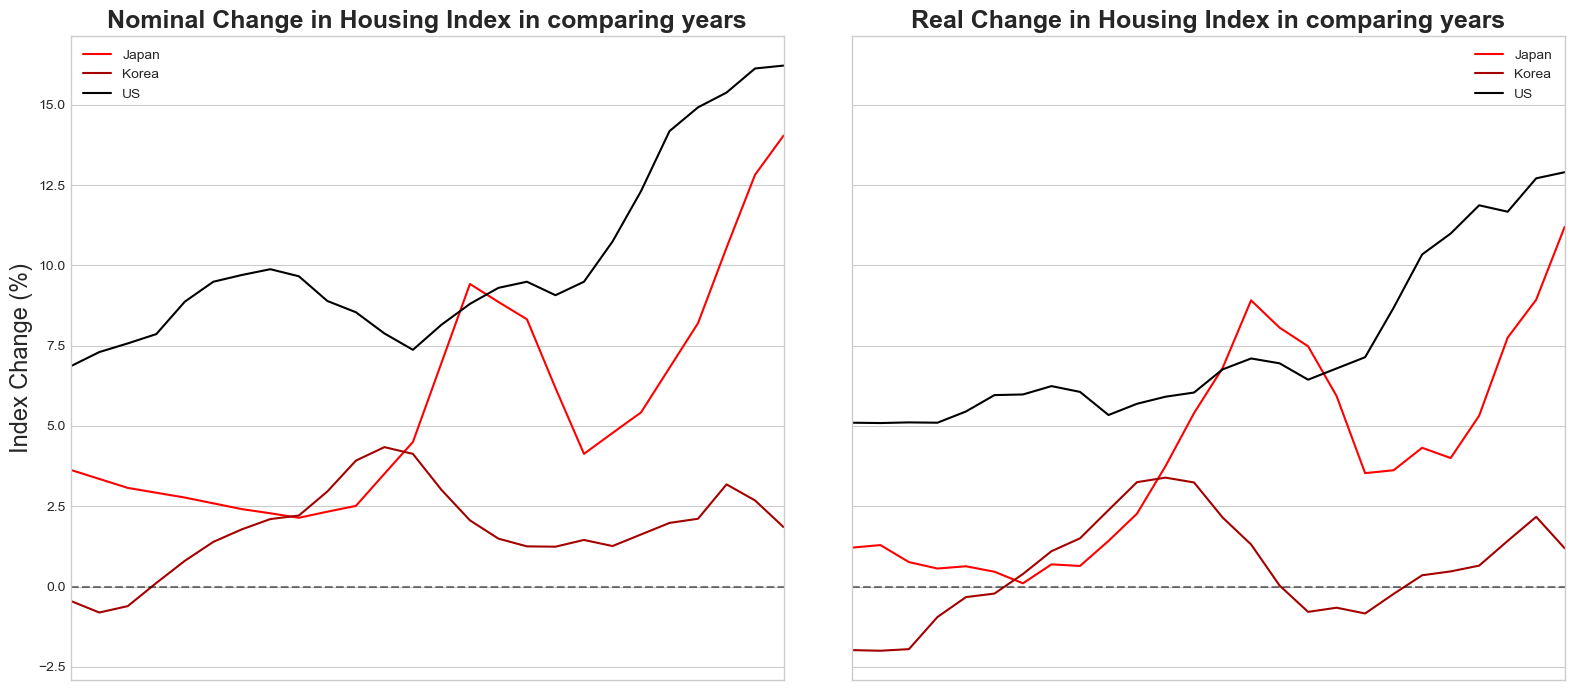

In [78]:
fig, ax = plt.subplots(1,2,figsize = (16,7), sharey = True)

comparative_housing_plot("Nominal Change", ax[0])
comparative_housing_plot("Real Change", ax[1])

plt.tight_layout()

## 집 값 상승률에 대한 분포 상관 분석

,Korea / Japan,Korea / US,US / Japan,0
Corr Coefficient,-0.461876,0.210717,0.454127,NaN
P-value,0.017531,0.301479,0.019782,NaN


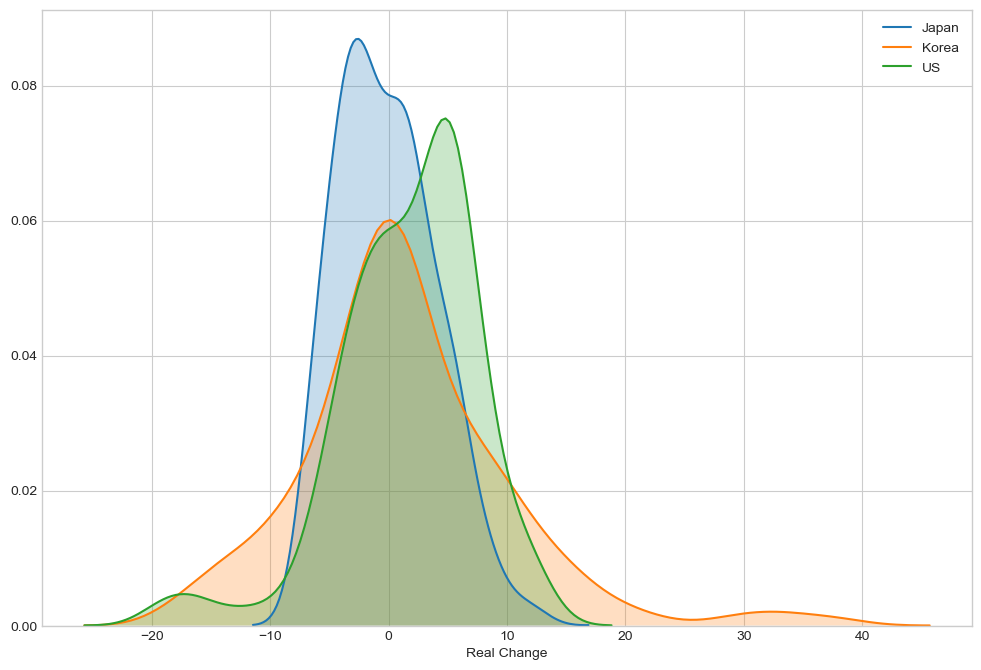

In [81]:
temp1 = data.xs("Japan", level = 0, axis =1).loc[:, "Real Change"].astype(float)
temp2 = data.xs("Korea", level = 0, axis =1).loc[:, "Real Change"].astype(float)
temp3 = data.xs("US", level = 0, axis =1).loc[:, "Real Change"].astype(float)


sns.distplot(temp1, hist = False, kde = True, kde_kws = {'shade':True, "linewidth" : 1.5}, label = "Japan")
plt.gcf().set_size_inches(12,8)
sns.distplot(temp2, hist = False, kde = True, kde_kws = {'shade':True, "linewidth" : 1.5}, label = "Korea")

sns.distplot(temp3, hist = False, kde = True, kde_kws = {'shade':True, "linewidth" : 1.5}, label = "US")

#plt.title("Distribution of Real Housing Index Returns (Quarterly)", fontsize = 17)

from scipy import stats

temp1_1 = data.xs("Japan", level = 0, axis =1).loc["1983-03-31":"1989-06-30", "Real Change"].astype(float)
temp2_1 = data.xs("Korea", level = 0, axis =1).loc["2013-03-31":"2019-06-30", "Real Change"].astype(float)
temp3_1 = data.xs("US", level = 0, axis =1).loc["1999-03-31":"2005-06-30", "Real Change"].astype(float)


pvalues = pd.DataFrame(stats.pearsonr(temp1_1.values,temp2_1.values))
pvalues["Korea / US"] = stats.pearsonr(temp2_1.values,temp3_1.values)
pvalues.index = ["Corr Coefficient", "P-value"]
pvalues.rename({0:"Korea / Japan"}, axis = 1, inplace = True)
pvalues["US / Japan"] = stats.pearsonr(temp1_1.values, temp3_1.values)
pvalues

#a = pd.DataFrame({}"H0 is rejected", "H0 is not rejected", "H0 is rejected"])

pd.concat([pvalues, pd.Series()], axis = 0)

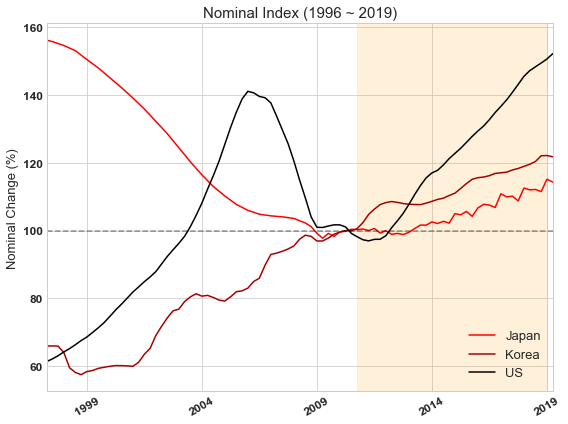

In [10]:
data.xs("Nominal Index", level = 1, axis = 1).iloc[85:, :].plot(cmap ='flag');
plt.gcf().set_size_inches(8,6)
plt.title("Nominal Index (1996 ~ 2019)", fontsize = 15)
plt.xlabel("", fontsize = 13)
plt.ylabel("Nominal Change (%)", fontsize = 13)
plt.axhline(y = 100, c = "black", alpha = 0.4, linestyle = "--")
plt.xticks(rotation = 30, fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.legend(fontsize = 13, loc = 4)
plt.axvspan("2010-12-31","2019-03-31" ,alpha=0.15, color='orange')
plt.tight_layout()

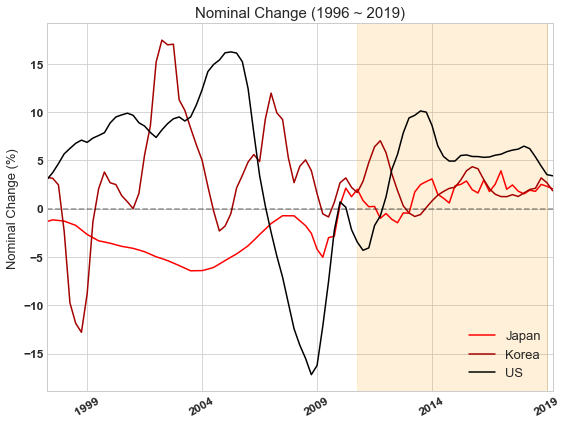

In [11]:
data.xs("Nominal Change", level = 1, axis = 1).iloc[85:, :].plot(cmap ='flag');
plt.gcf().set_size_inches(8,6)
plt.title("Nominal Change (1996 ~ 2019)", fontsize = 15)
plt.xlabel("", fontsize = 13)
plt.ylabel("Nominal Change (%)", fontsize = 13)
plt.axhline(y = 0, c = "black", alpha = 0.4, linestyle = "--")
plt.xticks(rotation = 30, fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.legend(fontsize = 13, loc = 4)
plt.axvspan("2010-12-31","2019-03-31" ,alpha=0.15, color='orange')
plt.tight_layout()

In [12]:
data.xs("Nominal Change", level = 1, axis = 1).iloc[80:, :]

,Japan,Korea,US
Date,,,
1996-03-31,-1.78,0.2,2.76
1996-06-30,-1.85,0.53,2.89
1996-09-30,-1.92,0.77,2.69
1996-12-31,-1.71,1.37,2.73
1997-03-31,-1.51,2.99,2.73
...,...,...,...
2018-06-30,1.91,1.98,6.21
2018-09-30,1.79,2.11,5.35
2018-12-31,2.51,3.18,4.4


# 소비자 물가지수 비교 (CPI) 
- not seasonally adjusted 
- quarterly 
- 기준년도: 2010
- DATA: 상승률, INDEX 




In [13]:
data = pd.read_excel('2 CPI .xlsx')

col1 = [["Japan", "Japan", "Korea", "Korea", "US", "US"], 
       ["CPI INDEX", "YOY Change","CPI INDEX", "YOY Change","CPI INDEX", "YOY Change"]]

data = data.iloc[1:, :]

data.set_index("Unnamed: 0", inplace = True)
data.index.name = "Date"
data.columns = col1
data["Year"] = data.index.strftime("%Y").astype(int)

data.head()

Japan                Korea                   US             \
           CPI INDEX YOY Change CPI INDEX YOY Change CPI INDEX YOY Change   
Date                                                                        
1966-01-31   25.8551     5.1793    3.1005     7.4201   14.5834     1.9231   
1966-02-28    26.051        6.4    3.1883     8.0789   14.6752     2.5641   
1966-03-31    26.051     5.5556    3.2399     9.6247    14.721     2.5559   
1966-04-30   26.4427     5.0584    3.2729     9.0377   14.8127     2.8662   
1966-05-31   26.2468     4.6875     3.364     9.8637   14.8127     2.8662   

            Year  
                  
Date              
1966-01-31  1966  
1966-02-28  1966  
1966-03-31  1966  
1966-04-30  1966  
1966-05-31  1966

## 1) 국가, 기간, datatype지정 CPI plot

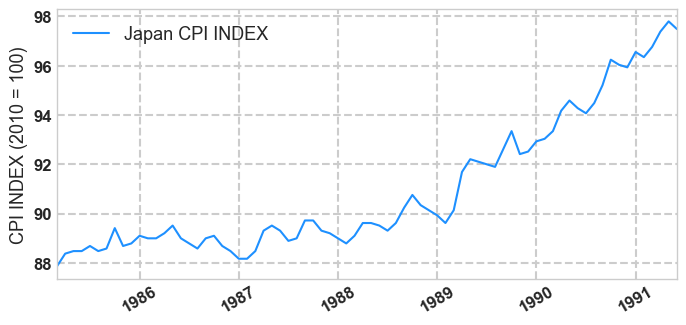

In [14]:
plt.style.use("default")
plt.style.use('seaborn-whitegrid')

def getCPI(data, country, datatype, startdate, enddate): 
    
    if (country == "Japan"):
         data.xs(country, level = 0, axis =1).loc[startdate:enddate, datatype].plot(label = "{} {}".format(country, datatype), color = "dodgerblue")
    elif(country == "Korea"):
         data.xs(country, level = 0, axis =1).loc[startdate:enddate, datatype].plot(label = "{} {}".format(country, datatype), color = "orange")
    else:
         data.xs(country, level = 0, axis =1).loc[startdate:enddate, datatype].plot(label = "{} {}".format(country, datatype), color = "green")
        
    #plt.title("{} ({} ~ {})".format(datatype, pd.to_datetime(startdate).strftime("%Y"), pd.to_datetime(enddate).strftime("%Y")), fontsize = 15)
    plt.gcf().set_size_inches(8,3.5)
    plt.xticks(rotation = 30, fontsize = 12, fontweight = "bold")
    plt.yticks(fontsize = 12, fontweight = "bold")
    plt.legend(fontsize = 13, loc = 0)
    plt.grid(True, linewidth = 1.5, linestyle = "--")
    
    #if (country == "Japan"):
        #plt.axvspan("1985-01-31","1991-06-30" ,alpha=0.15, color='steelblue')
    #elif(country == "Korea"):
        #plt.axvspan("2013-12-31","2019-06-30" ,alpha=0.2, color='gold')
    #else:
        #plt.axvspan("2001-01-31","2007-01-31" ,alpha=0.3, color='green')
    
    if (datatype == "CPI INDEX"):
         plt.xlabel("", fontsize = 13)
         plt.ylabel("CPI INDEX (2010 = 100)", fontsize = 13)
    else: 
         plt.xlabel("", fontsize = 13)
         plt.ylabel("CPI Year-Over-Year Change (%)", fontsize = 13)


getCPI(data, "Japan", "CPI INDEX", "1985-03-31","1991-06-30")
#getCPI(data, "Korea", "CPI INDEX", "2013-03-31","2019-06-30")
#getCPI(data, "US", "CPI INDEX", "1999-03-31","2005-06-30")

## 2) CPI 비교기간 상승률 

,Japan YOY Change,Korea YOY Change,US YOY Change
Japan YOY Change,1.000000,0.016475,0.588366
Korea YOY Change,0.016475,1.000000,-0.021479
US YOY Change,0.588366,-0.021479,1.000000


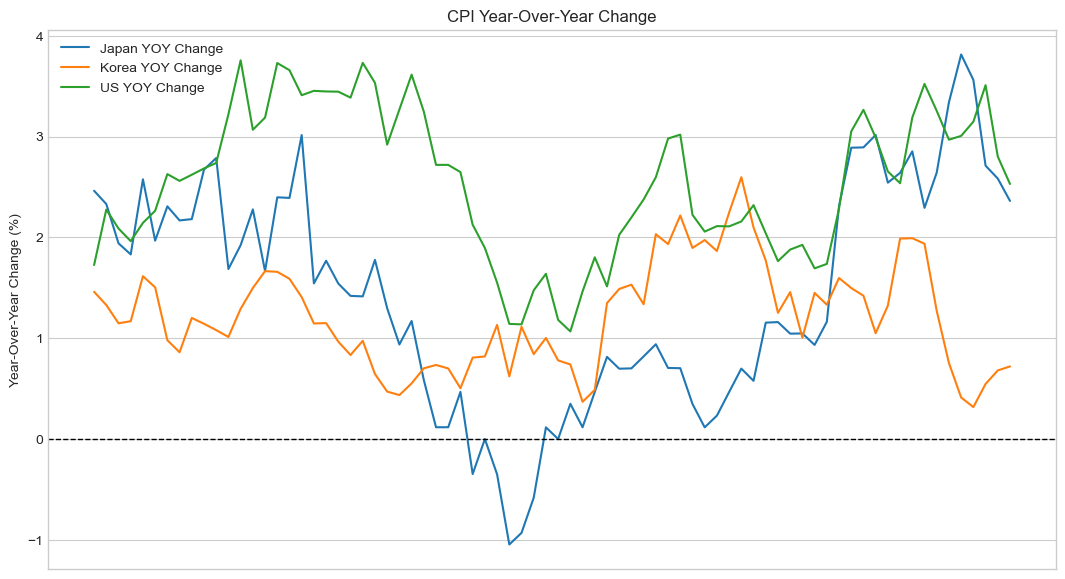

In [16]:
temp1 = data.xs("Japan", level = 0, axis =1).loc["1984-03-31":"1990-06-30", "YOY Change"]

temp2 = data.xs("Korea", level = 0, axis =1).loc["2013-03-31":"2019-06-30", "YOY Change"]

temp3 = data.xs("US", level = 0, axis =1).loc["1999-03-31":"2005-06-30", "YOY Change"]

temp1_mean = temp1.mean()
temp2_mean = temp2.mean()
temp3_mean = temp3.mean()
temp1_var = temp1.var()
temp1.index = range(76)
temp2.index = range(76)
temp3.index = range(76)

temp4 = pd.concat([temp1, temp2, temp3], axis =1).astype(float)
temp4.columns = ["Japan YOY Change", "Korea YOY Change", "US YOY Change"]


temp4.plot()
plt.gcf().set_size_inches(13,7)
plt.title("CPI Year-Over-Year Change")
plt.xticks([])
plt.ylabel("Year-Over-Year Change (%)")
plt.axhline(y = 0, linestyle = "--", linewidth = 1, color = "black")


temp4.corr()

In [ ]:
print("Japan CPI YOY CHANGE MEAN: ",temp1.mean())
print("KOREA CPI YOY CHANGE MEAN: ",temp2.mean())
print("US CPI YOY CHANGE MEAN: ",temp3.mean())
print("Japan CPI YOY CHANGE VARIANCE: ",temp1.var())
print("KOREA CPI YOY CHANGE VARIANCE: ",temp2.var())
print("US CPI YOY CHANGE VARIANCE: ",temp3.var())

## 3) CPI 전체기간 분포 확인 

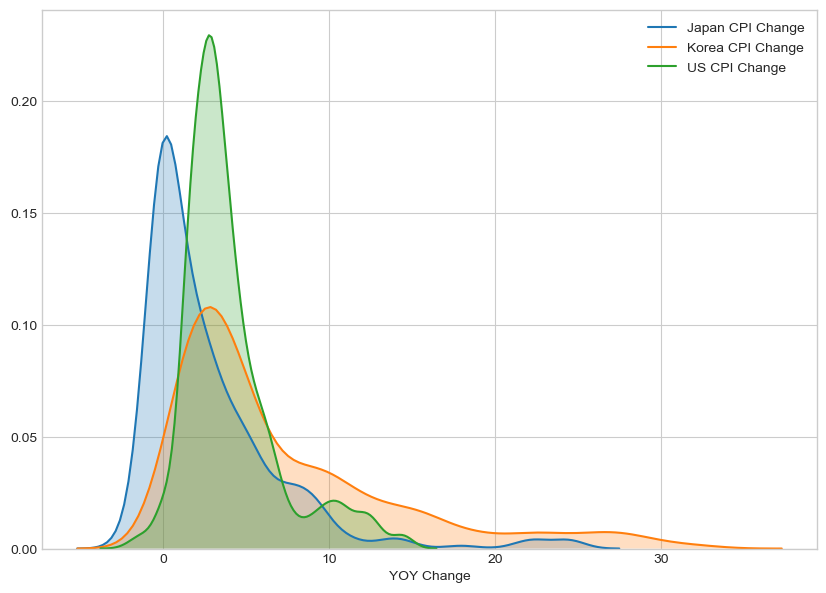

In [17]:

sns.distplot(data.xs("Japan", level = 0, axis = 1).loc[:,"YOY Change"], 
             hist = False, kde = True, kde_kws = {'shade':True, "linewidth" : 1.5}, label = "Japan CPI Change")

sns.distplot(data.xs("Korea", level = 0, axis = 1).loc[:,"YOY Change"], 
             hist = False, kde = True, kde_kws = {'shade':True, "linewidth" : 1.5}, label = "Korea CPI Change")

sns.distplot(data.xs("US", level = 0, axis = 1).loc[:,"YOY Change"], 
             hist = False, kde = True, kde_kws = {'shade':True, "linewidth" : 1.5}, label = "US CPI Change")

#plt.title("CPI Change distributions by country (1966~2019)")
plt.gcf().set_size_inches(10,7)


## 4) CPI INDEX (1966 ~ 2019)

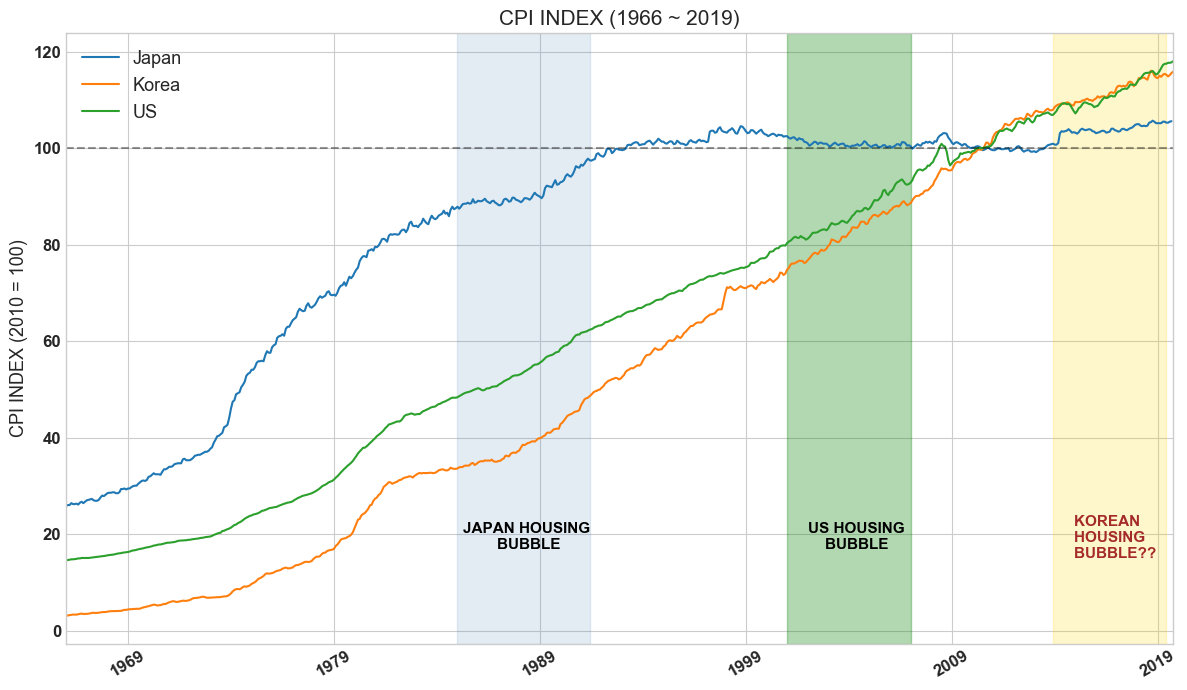

In [297]:
data.xs("CPI INDEX", level = 1, axis = 1).plot()

plt.title("CPI INDEX (1966 ~ 2019)", fontsize = 15)
plt.gcf().set_size_inches(12,7)
plt.xlabel("", fontsize = 13)
plt.ylabel("CPI INDEX (2010 = 100)", fontsize = 13)
plt.axhline(y = 100, c = "black", alpha = 0.4, linestyle = "--")
plt.xticks(rotation = 30, fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.legend(fontsize = 13, loc = 0)
plt.axvspan("2013-12-31","2019-06-30" ,alpha=0.2, color='gold')
plt.axvspan("2001-01-31","2007-01-31" ,alpha=0.3, color='green')
plt.axvspan("1985-01-31","1991-06-30" ,alpha=0.15, color='steelblue')

plt.text("2014-12-20",15, "KOREAN \nHOUSING \nBUBBLE?? ", fontweight= "bold", fontsize = 11, color = "brown")
plt.text("2002-01-01",17, "US HOUSING \n    BUBBLE", fontweight= "bold", fontsize = 11, color = "black")
plt.text("1985-04-10",17, "JAPAN HOUSING \n        BUBBLE", fontweight= "bold", fontsize = 11, color = "black")

plt.tight_layout()

## 5) CPI 전체기간 변화율 (1966 ~ 2019)

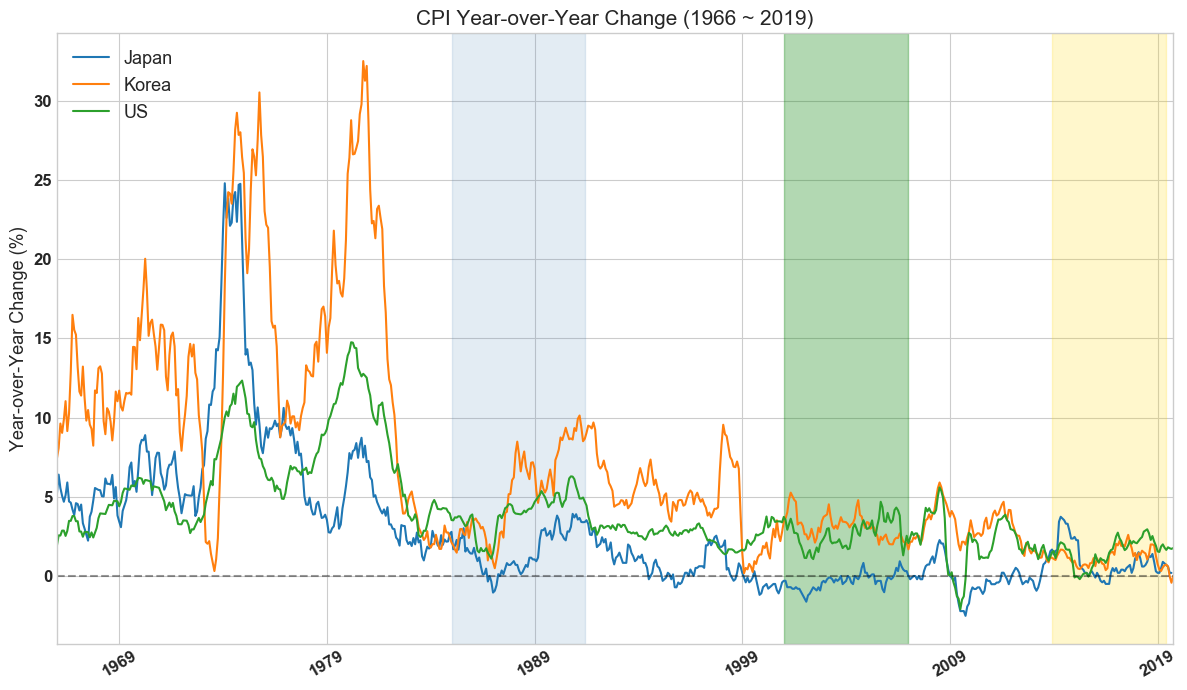

In [50]:
data.xs("YOY Change", level = 1, axis = 1).plot()
plt.gcf().set_size_inches(12,7)
plt.title("CPI Year-over-Year Change (1966 ~ 2019)", fontsize = 15)
plt.xlabel("", fontsize = 13)
plt.ylabel("Year-over-Year Change (%)", fontsize = 13)
plt.axhline(y = 0, c = "black", alpha = 0.4, linestyle = "--")
plt.xticks(rotation = 30, fontsize = 12, fontweight = "bold")
plt.yticks(fontsize = 12, fontweight = "bold")
plt.legend(fontsize = 13, loc = 0)
plt.axvspan("2013-12-31","2019-06-30" ,alpha=0.2, color='gold')
plt.axvspan("2001-01-31","2007-01-31" ,alpha=0.3, color='green')
plt.axvspan("1985-01-31","1991-06-30" ,alpha=0.15, color='steelblue')
plt.tight_layout()

# 중앙은행 금리 비교 

Text(0.5, 1.0, 'Central Bank Policy Rate in Comparing Years')

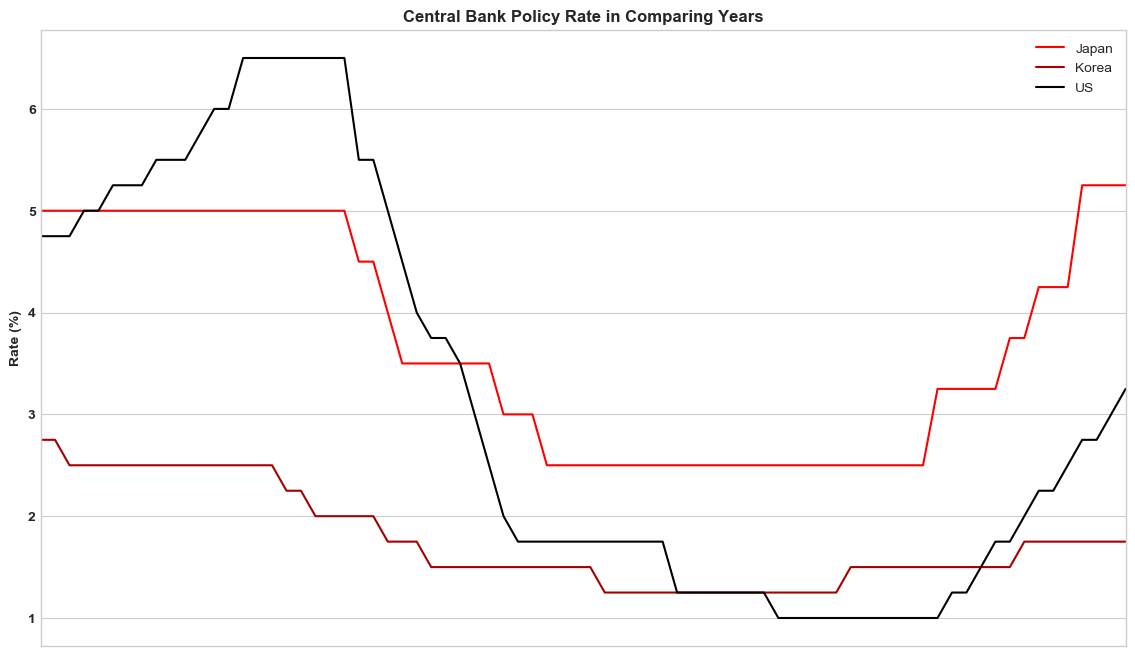

In [52]:
os.listdir()

data = pd.read_excel('3 Central Bank Policy Rate.xlsx', parsedate = [0])
data = data.iloc[1:,:]
data.set_index("Unnamed: 0", inplace = True)
data.index.name = "Year"
data.columns = ["Japan", "Korea", "US"]



temp1 = data.loc["1984-03-31":"1990-06-30", "Japan"]
temp1.index = range(len(temp1))
temp2 = data.loc["2013-03-31":"2019-06-30", "Korea"]
temp2.index = range(len(temp2))
temp3 = data.loc["1999-03-31":"2005-06-30", "US"]
temp3.index = range(len(temp3))

temp4 = pd.concat([temp1, temp2, temp3], axis = 1)


temp4.plot(figsize = (14,8), cmap = "flag")
plt.xticks([])
plt.ylabel("Rate (%)", fontweight = "bold")
plt.yticks(fontweight = "bold")
plt.title("Central Bank Policy Rate in Comparing Years", fontweight = "bold")

In [ ]:
## Central Bank Policy Rate 가 보여주는 것

1) 셋 다 비슷한 증가 (보합) -> 감소 -> 증가 형태를 보여준다 (Momentum 강도의 차이)
2) 기준금리가 하락하면서 돈이 돌게 되고 -> 부동산의 투자가 활발해진다 
3) 미국과 일본의 경우 금리가 상승하면서 집 값 상승률 이 둔화되는 모습 
4) 지금과 시기가 다르다. 통화정책의 효과성이 감소하고, 서유럽의 복지국가, 선진국 들은 저금리를 오래동안 유지. 저금리 체제로 바뀌었다. 

# GDP 대비 부채 (credit) 비교 

- credit (신용) 이라는 항목중에 대출도 발행, 수용 주체에 따라 굉장히 종류가 많다. 
- real estate --> 비유동적인 자산 + 일시불 지급이 힘든 자산이기에 대출을 끼고 구매하는 경우가 대다수이다. 
- 사람들은 주동산 가격이 오를 것이라고 생각하면 상식적으로 담보대출을 받더라도 부동산을 사려고 한다 (경제는 기대심리에 의해 움직이니까) 
- 그러나 부동산 투자 주체는 기업, 정부, 외국인 등 다양하다. 주체에 대한 비율 데이터를 찾기가 거의 불가능했기 때문에 
  가계대출 대비 총 gdp비율, 그리고 이를 총 신용 대비 총 gdp 비율과 비교하며 살펴본다.
- Credit-to-GDP ratios (actual data) - Korea - Credit from All sectors to Private non-financial sector

Text(1985-04-10, 70, 'JAPAN HOUSING \n        BUBBLE')

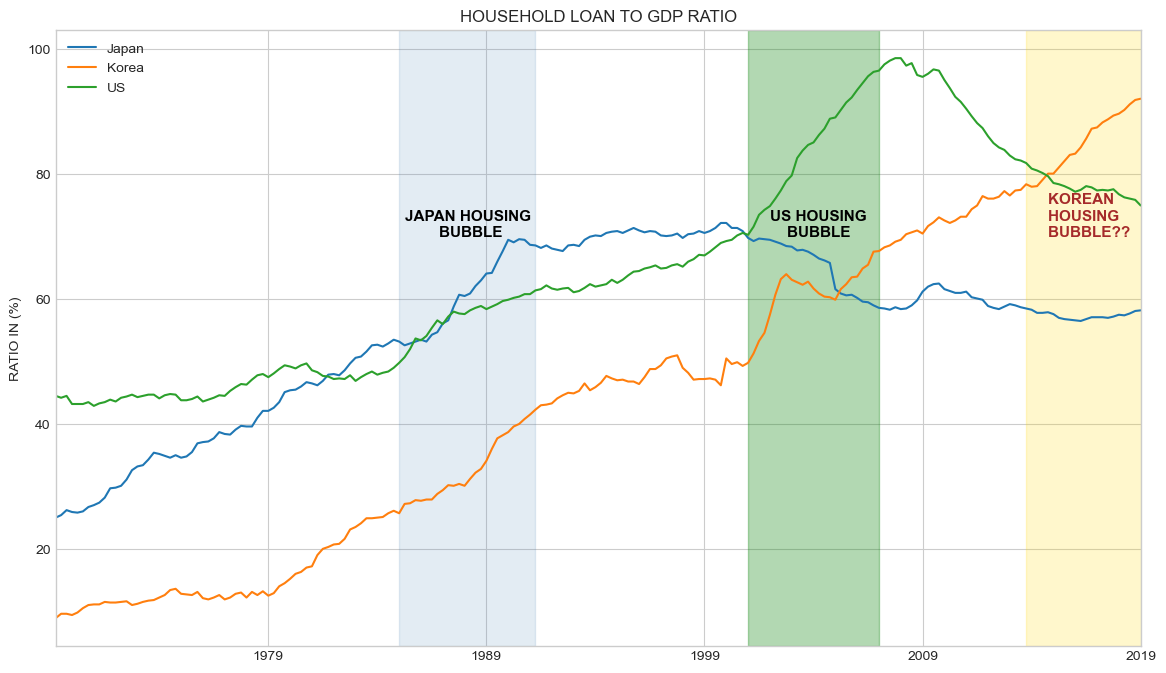

In [18]:
os.listdir()

data = pd.read_excel("4 GDP debt .xlsx", sheet_name = "real")
data = data.iloc[3:,[0,1,3,5]]
data.set_index("Unnamed: 0", inplace = True)
data.index = pd.to_datetime(data.index)
data.columns = ["Korea", "US", "Japan"]
data.index.name = ""

data2 = pd.read_excel("4 GDP debt .xlsx", sheet_name = "real")
data2 = data2.iloc[3:,[0,2,4,6]]
data2.set_index("Unnamed: 0", inplace = True)
data2.index = pd.to_datetime(data2.index)
data2.columns = ["Korea", "US", "Japan"]
data2.index.name = ""

data = data.loc["1969-06-30":]
#data.plot()


data2 = data2.loc["1969-06-30":]
data2 = data2[["Japan", "Korea", "US"]]
data2.plot(figsize = (14,8))
plt.title("HOUSEHOLD LOAN TO GDP RATIO")
plt.ylabel("RATIO IN (%)")

plt.axvspan("2013-12-31","2019-06-30" ,alpha=0.2, color='gold')
plt.axvspan("2001-01-31","2007-01-31" ,alpha=0.3, color='green')
plt.axvspan("1985-01-31","1991-06-30" ,alpha=0.15, color='steelblue')

plt.text("2014-12-20",70, "KOREAN \nHOUSING \nBUBBLE?? ", fontweight= "bold", fontsize = 11, color = "brown")
plt.text("2002-01-01",70, "US HOUSING \n    BUBBLE", fontweight= "bold", fontsize = 11, color = "black")
plt.text("1985-04-10",70, "JAPAN HOUSING \n        BUBBLE", fontweight= "bold", fontsize = 11, color = "black")

In [19]:
data = pd.read_excel("4 GDP debt .xlsx", sheet_name = "real")
data = data.iloc[3:,[0,1,3,5]]
data.columns

Index(['Unnamed: 0', 'Non Financial Sector Credit to GDP',
       'Non Financial Sector Credit to GDP.1',
       'Non Financial Sector Credit to GDP.2'],
      dtype='object')

Text(0.5, 1.0, 'GDP TO HOUSEHOLD DEBT RATIO')

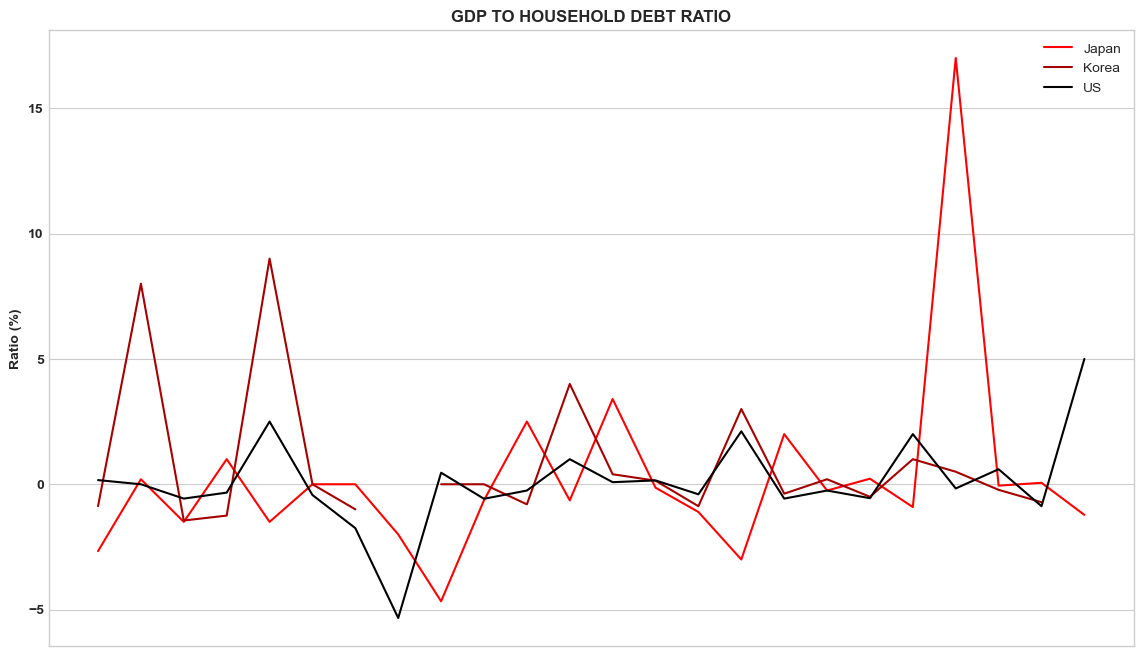

In [20]:
temp1 = data2.loc["1984-03-31":"1990-06-30", "Japan"].diff().dropna().pct_change()
temp1.index = range(len(temp1))
temp2 = data2.loc["2013-03-31":"2019-06-30", "Korea"].diff().dropna().pct_change()
temp2.index = range(len(temp2))
temp3 = data2.loc["1999-03-31":"2005-06-30", "US"].diff().dropna().pct_change()
temp3.index = range(len(temp3))

temp4 = pd.concat([temp1, temp2, temp3], axis = 1)


temp4.plot(figsize = (14,8), cmap = "flag")
plt.xticks([])
plt.ylabel("Ratio (%)", fontweight = "bold")
plt.yticks(fontweight = "bold")
plt.title("GDP TO HOUSEHOLD DEBT RATIO", fontweight = "bold")

# 향후 추가적으로 살펴보면 좋을 것 같은 거시 경제 변수 

- MBS 발행량 (당시 일본의 MBS 발행 데이터를 찾는 것이 힘들었기에 확보 방안이 필요하다) 
- 단순 출생률과 경제활동인구의 증감이 아니라 부동산 매매의 주력 세력을 파악하고 해외 투자자에서 유입된 자금 등을 살펴보아야 한다. 


